In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
missing_values = data.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
data.drop('date', axis=1, inplace=True)

In [5]:
data.drop('id', axis=1, inplace=True)

In [6]:
data.dropna(inplace=True)

In [7]:
missing_values = data.isnull().sum()
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
X = data.drop(['price'], axis=1)
y = data['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 43445419498.75585


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.7092033124955541


In [15]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate R^2 score for training set
train_r = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for test set
test_r = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r)

Training R^2 Score: 0.696703011512855
Testing R^2 Score: 0.7092033124955541


<AxesSubplot:xlabel='waterfront', ylabel='price'>

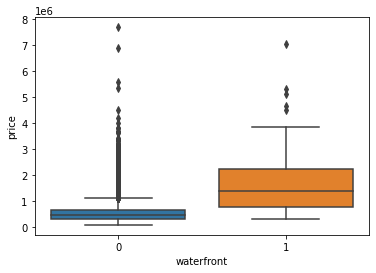

In [16]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x='waterfront',y='price',data=data)

## Cross-validation and regularization techniques using Ridge regression

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

# Create a pipeline with feature scaling and Ridge regression
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.5))

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive values
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Average MSE:", np.mean(cv_scores))

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = pipeline.score(X_test, y_test)
print("Test Score:", test_score)

Cross-Validation Scores:
[4.40307545e+10 4.53361938e+10 3.79548168e+10 3.63994863e+10
 3.62176251e+10]
Average MSE: 39987775309.24807
Test Score: 0.7092026940058495


## Cross-validation and apply regularization techniques using Random forest

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor with regularization
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the cross-validation scores and metrics
print("Cross-Validation Scores:")
print(cv_scores)
print("Average MSE:", cv_scores.mean())
print("Train MSE:", train_mse)
print("Train R^2 Score:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2 Score:", test_r2)


Cross-Validation Scores:
[1.78971291e+10 1.82441791e+10 1.46524013e+10 1.59028731e+10
 1.85711988e+10]
Average MSE: 17053556278.976986
Train MSE: 2372559269.264744
Train R^2 Score: 0.9819052414587827
Test MSE: 18265768201.029846
Test R^2 Score: 0.8777402785180695


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
model1 = RandomForestRegressor()

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred1)
print("R^2 Score:", r2)

R^2 Score: 0.8760677725288432


In [20]:
# Make predictions on the training set
y_train_pred = model1.predict(X_train)

# Calculate R^2 score for training set
train_r1 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r1)

# Make predictions on the test set
y_test_pred = model1.predict(X_test)

# Calculate R^2 score for test set
test_r1 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r1)

Training R^2 Score: 0.9825096642289739
Testing R^2 Score: 0.8760677725288432


In [21]:
import joblib

# Save the model to a file
joblib.dump(model1, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Gradient Boosting Regression model

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
model2 = GradientBoostingRegressor()

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred2)
print("R^2 Score:", r2)

R^2 Score: 0.8705254933810994


In [23]:
# Make predictions on the training set
y_train_pred = model2.predict(X_train)

# Calculate R^2 score for training set
train_r2 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r2)

# Make predictions on the test set
y_test_pred = model2.predict(X_test)

# Calculate R^2 score for test set
test_r2 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r2)

Training R^2 Score: 0.9034080048596912
Testing R^2 Score: 0.8705254933810994


# SVR

In [24]:
from sklearn.svm import SVR

# Create an SVR model
model3 = SVR()

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred3)
print("R^2 Score:", r2)


R^2 Score: -0.0628528345812791


In [25]:
# Make predictions on the training set
y_train_pred = model3.predict(X_train)

# Calculate R^2 score for training set
train_r3 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r3)

# Make predictions on the test set
y_test_pred = model3.predict(X_test)

# Calculate R^2 score for test set
test_r3 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r3)

Training R^2 Score: -0.059414111253847546
Testing R^2 Score: -0.0628528345812791


# XGBoost model

In [26]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Convert the training and testing data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 3
}

# Train the XGBoost model
num_boost_round = 100
model4 = xgb.train(params, dtrain, num_boost_round=num_boost_round)

# Make predictions on the test set
y_pred4 = model4.predict(dtest)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred4)
print("R^2 Score:", r2)

R^2 Score: 0.8704034054948815


In [27]:
# Make predictions on the training set
y_train_pred = model4.predict(dtrain)
# Calculate R^2 score for training set
train_r4 = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = model4.predict(dtest)
# Calculate R^2 score for test set
test_r4 = r2_score(y_test, y_test_pred)

# Print the accuracy scores
print("Training Accuracy (R^2):", train_r4)
print("Test Accuracy (R^2):", test_r4)

Training Accuracy (R^2): 0.9018684829546557
Test Accuracy (R^2): 0.8704034054948815


## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model
ridge = Ridge(alpha=0.00000000001)  # You can adjust the alpha parameter as needed
ridge.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = ridge.predict(X_train_scaled)

# Calculate R^2 score for the training set
train_r5 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r5)

# Make predictions on the test set
y_test_pred = ridge.predict(X_test_scaled)

# Calculate R^2 score for the test set
test_r5 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r5)


Training R^2 Score: 0.6967030115128544
Testing R^2 Score: 0.7092033124955616


# Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso Regression model
lasso = Lasso(alpha=1.0, max_iter=10000, tol=1e-4)  # Increase the number of iterations
lasso.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = lasso.predict(X_train_scaled)

# Calculate R^2 score for the training set
train_r6 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r6)

# Make predictions on the test set
y_test_pred = lasso.predict(X_test_scaled)

# Calculate R^2 score for the test set
test_r6 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r6)

Training R^2 Score: 0.6967030111952661
Testing R^2 Score: 0.7092037509876659


C:\Users\ikhla\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+13, tolerance: 2.267e+11
  model = cd_fast.enet_coordinate_descent(


# Elastic Net

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters as needed
elastic_net.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = elastic_net.predict(X_train_scaled)

# Calculate R^2 score for the training set
train_r7 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r7)

# Make predictions on the test set
y_test_pred = elastic_net.predict(X_test_scaled)

# Calculate R^2 score for the test set
test_r7 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r7)


Training R^2 Score: 0.6646151821274595
Testing R^2 Score: 0.6701266060828919


# Polynomial Regression (Degree=2)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train_scaled)

# Calculate R^2 score for the training set
train_r8 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r8)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test_scaled)

# Calculate R^2 score for the test set
test_r8 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r8)


Training R^2 Score: 0.8252475052691872
Testing R^2 Score: 0.8378372985238478


# Decision tree 

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
model_dt = DecisionTreeRegressor()

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate train accuracy
y_train_pred_dt = model_dt.predict(X_train)
train_accuracy_dt = r2_score(y_train, y_train_pred_dt)

# Calculate test accuracy
test_accuracy_dt = r2_score(y_test, y_pred_dt)

print("Train Accuracy:", train_accuracy_dt)
print("Test Accuracy:", test_accuracy_dt)

Train Accuracy: 0.9992474717733322
Test Accuracy: 0.7268744417142109


# Neural Network Regression

In [33]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model_nn1 = Sequential()
model_nn1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_nn1.add(Dense(64, activation='relu'))
model_nn1.add(Dense(32, activation='relu'))
model_nn1.add(Dense(32, activation='relu'))
model_nn1.add(Dense(32, activation='relu'))
model_nn1.add(Dense(16, activation='relu'))
model_nn1.add(Dense(8, activation='relu'))
model_nn1.add(Dense(1))

# Compile the model
model_nn1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model_nn1.fit(X_train, y_train, batch_size=32, epochs=220, verbose=0)

# Make predictions on the train and test sets
y_train_pred = model_nn1.predict(X_train)
y_test_pred = model_nn1.predict(X_test)

# Calculate R^2 score for train and test sets
r2_train_nn1 = r2_score(y_train, y_train_pred)
r2_test_nn1 = r2_score(y_test, y_test_pred)
print("Train R^2 Score:", r2_train_nn1)
print("Test R^2 Score:", r2_test_nn1)

136/136 [==============================] - 0s 1ms/step
Train R^2 Score: 0.9345515787939384
Test R^2 Score: 0.8796310698954735


136/136 [==============================] - 1s 2ms/step - loss: 17983279104.0000


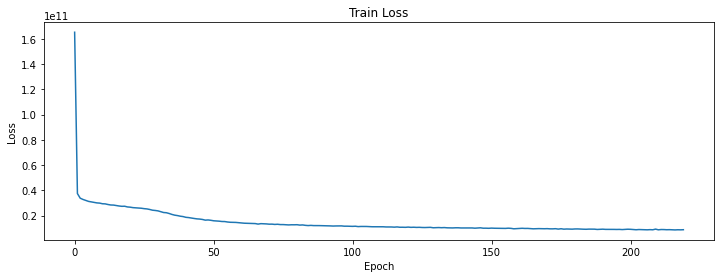

Test Loss: 17983279104.0


In [34]:
# Extract train loss from history
train_loss = history.history['loss']

# Evaluate the model on the test set
test_loss = model_nn1.evaluate(X_test, y_test)

# Plot train loss
plt.figure(figsize=(12, 4))
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Print test loss
print("Test Loss:", test_loss)

# Models comparison

In [35]:
# Create a dictionary with the model names and accuracy scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Polynomial Regression', 'Decision Tree Regression', 'Neural Network Regression'],
    'Train Accuracy': [train_r, train_r1, train_r2, train_r3, train_r4, train_r5, train_r6, train_r7, train_r8, train_accuracy_dt, r2_train_nn1],
    'Test Accuracy': [test_r, test_r1, test_r2, test_r3, test_r4, test_r5, test_r6, test_r7, test_r8, test_accuracy_dt, r2_test_nn1]
}

# Create a DataFrame
models = pd.DataFrame(data)

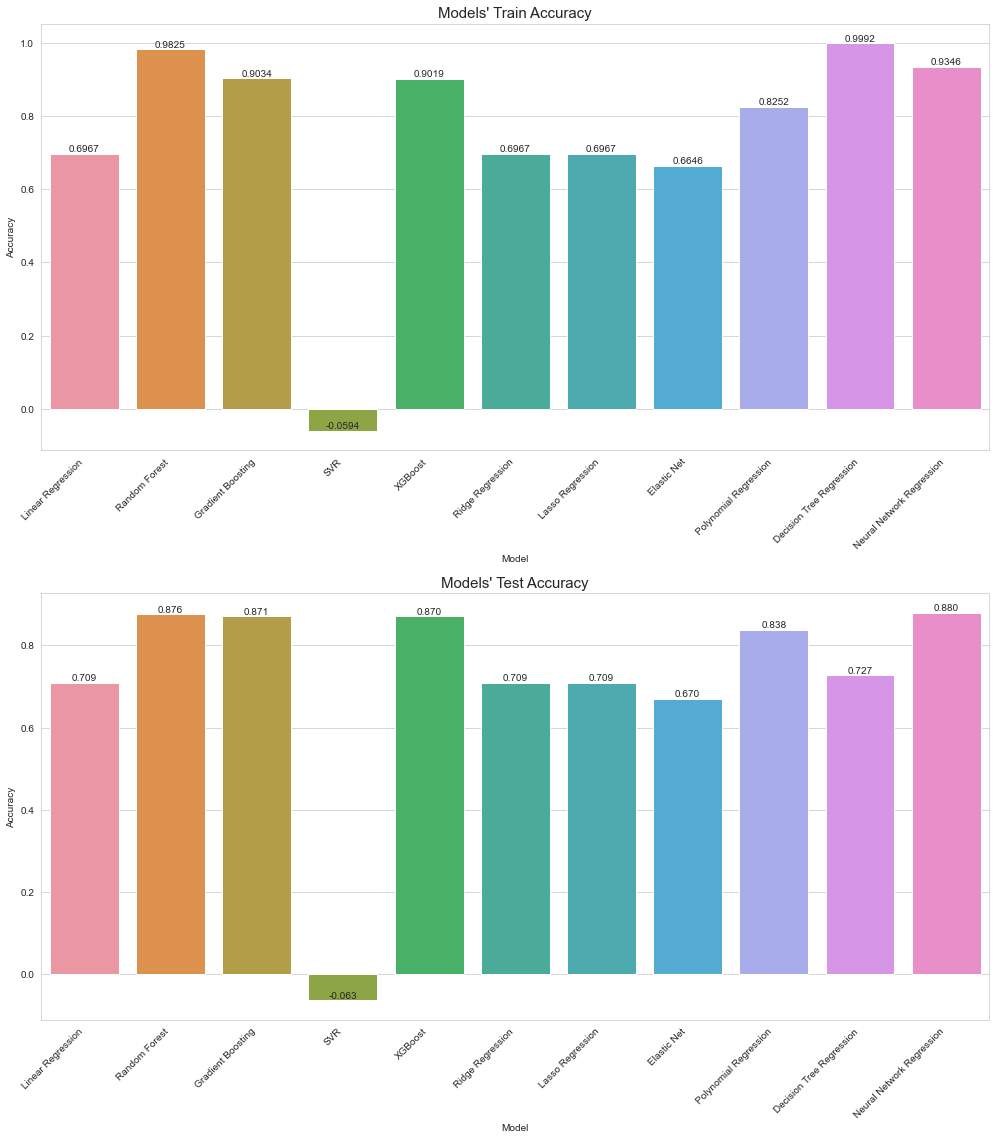

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to include grids
sns.set_style("whitegrid")

plt.figure(figsize=(14, 16))

# Plot train accuracy
plt.subplot(2, 1, 1)
sns.barplot(x=models['Model'], y=models['Train Accuracy'])
plt.title("Models' Train Accuracy", size=15)
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add accuracy values above each bar
for i, v in enumerate(models['Train Accuracy']):
    plt.text(i, v, "{:.4f}".format(v), ha='center', va='bottom')

# Plot test accuracy
plt.subplot(2, 1, 2)
sns.barplot(x=models['Model'], y=models['Test Accuracy'])
plt.title("Models' Test Accuracy", size=15)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add accuracy values above each bar
for i, v in enumerate(models['Test Accuracy']):
    plt.text(i, v, "{:.3f}".format(v), ha='center', va='bottom')

sns.set(style="ticks", rc={"axes.grid": True, "grid.linestyle": ":"})  # Add more gridlines

plt.tight_layout()
plt.show()

## Data augmentation

In [37]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_augmented, y_augmented = ros.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
model1 = RandomForestRegressor()

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred1)
print("R^2 Score:", r2)

R^2 Score: 0.9996412922095974


In [40]:
# Make predictions on the training set
y_train_pred = model1.predict(X_train)

# Calculate R^2 score for training set
train_r2 = r2_score(y_train, y_train_pred)
print("Training R^2 Score:", train_r2)

# Make predictions on the test set
y_test_pred = model1.predict(X_test)

# Calculate R^2 score for test set
test_r2 = r2_score(y_test, y_test_pred)
print("Testing R^2 Score:", test_r2)

Training R^2 Score: 0.9998460312657443
Testing R^2 Score: 0.9996412922095974
